In [7]:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import seaborn as sns
import os 
import sys
import pandas as pd
import matplotlib.pyplot as plt

In [8]:

plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 500) 
sns.set(style='darkgrid')
%matplotlib inline

filename3 = os.path.join(os.getcwd(), "MASTER_DATASET.csv")
df = pd.read_csv(filename3, header=0)

In [9]:
df.describe()

,# total population,# female population,# male population,# female younger population (0 - 14 years),# male younger population (0 - 14 years),# total younger population (0 - 14 years),# female older population (60 years and up),# male older population (60 years and up),# total older population (60 years and up),# registered IDPs,# people exposed,# people affected,# people in need,# people in level 1 humanitarian condition,# people in level 2 humanitarian condition,# people in level 3 humanitarian condition,# people in level 4 humanitarian condition,# people in level 5 humanitarian condition,# km² landmass affected,# km² controlled by Ukrainian authorities/forces,# km² controlled by Russian forces,# km² unconfirmed control,# battles,# explosions/remote violence,# violence against civilians,# fatalities,# civilian fatalities,# civilian injuries,# total infrastructure damage,# total access events,# unemployed people
count,5.250000e+02,5.250000e+02,5.250000e+02,525.000000,525.000000,525.00000,525.000000,525.00000,5.250000e+02,525.000000,5.250000e+02,5.250000e+02,5.250000e+02,5.250000e+02,525.0,5.250000e+02,525.000000,5.250000e+02,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.00000,525.000000
mean,1.658112e+06,8.796288e+05,7.602792e+05,118611.760000,126183.680000,244795.44000,259300.440000,146794.88000,4.060953e+05,122234.950476,1.525339e+06,6.047390e+05,6.047390e+05,8.487303e+05,0.0,4.675680e+05,26199.619048,9.440000e+04,21978.681905,19594.567619,3319.283810,57.388571,24.582857,112.163810,1.689524,105.937143,147.139048,195.245714,19.365714,9.07619,8456.175238
std,8.483182e+05,4.420377e+05,3.705388e+05,52314.254783,55778.561277,108089.63569,154764.441346,88083.77201,2.426745e+05,124876.963446,9.502537e+05,5.550330e+05,5.550330e+05,6.053553e+05,0.0,4.698511e+05,97974.507900,4.044155e+05,8975.535529,9686.304743,7610.398457,211.684793,84.583506,261.282925,7.702532,289.368874,455.372498,562.803501,67.764942,17.58789,4923.371638
min,4.330000e+05,4.687770e+05,4.142720e+05,61356.000000,64084.000000,125440.00000,116988.000000,69688.00000,1.866760e+05,1032.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1495.000000
25%,1.033580e+06,5.589930e+05,4.809030e+05,76623.000000,81913.000000,158536.00000,153827.000000,88706.00000,2.387380e+05,14614.000000,1.018462e+06,2.570000e+05,2.570000e+05,5.391060e+05,0.0,1.490400e+05,0.000000,0.000000e+00,20053.000000,12758.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,4457.000000
50%,1.250000e+06,6.555030e+05,5.970840e+05,95205.000000,101245.000000,196450.00000,193654.000000,109045.00000,3.026990e+05,80771.000000,1.225666e+06,4.620000e+05,4.620000e+05,7.981150e+05,0.0,3.600000e+05,0.000000,0.000000e+00,24016.000000,20940.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.00000,7588.000000
75%,2.098324e+06,1.136515e+06,9.618090e+05,153069.000000,163542.000000,316611.00000,333832.000000,194370.00000,5.282020e+05,163491.000000,2.098324e+06,7.660000e+05,7.660000e+05,1.004673e+06,0.0,6.050000e+05,0.000000,0.000000e+00,28132.000000,28132.000000,0.000000,0.000000,2.000000,70.000000,0.000000,21.000000,4.000000,13.000000,10.000000,8.00000,11479.000000
max,4.272000e+06,2.207252e+06,1.839235e+06,232566.000000,248470.000000,481036.00000,810872.000000,465603.00000,1.276475e+06,512237.000000,4.272000e+06,2.600000e+06,2.600000e+06,3.172000e+06,0.0,2.500000e+06,521520.000000,2.600000e+06,33348.000000,33348.000000,26657.000000,2400.000000,726.000000,1723.000000,127.000000,2508.000000,2290.000000,3263.000000,833.000000,166.00000,26865.000000


In [ ]:
'''
Data between severity level and fatalities are linear when plotted.
'''


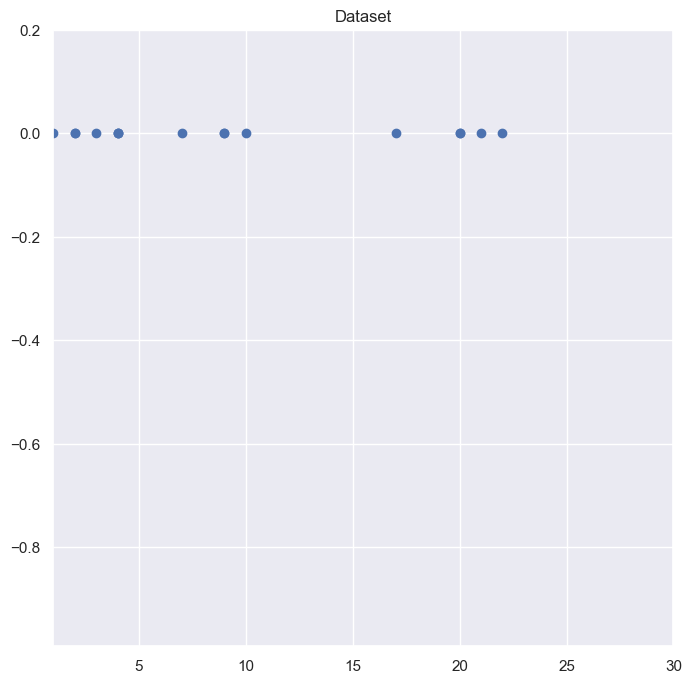

In [81]:
x1 = np.array(df['# fatalities'])
x2 = np.array(df['# people in level 1 humanitarian condition'])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
plt.plot()
plt.xlim([1, 30])
plt.ylim([-.99, .2])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

In [87]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 15)
 
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\Arielle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Arielle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Arielle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.

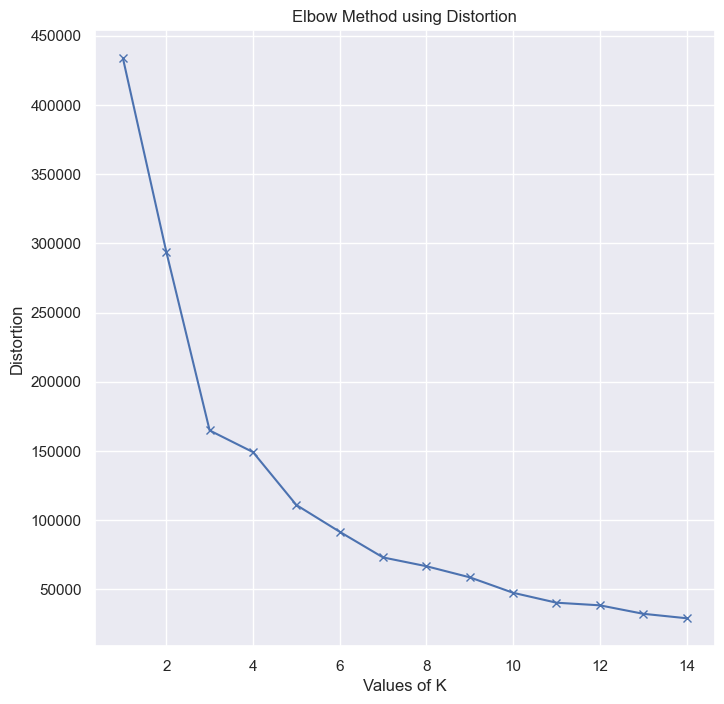

In [88]:

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('Elbow Method using Distortion')
plt.show()

In [ ]:
#Minimized range of K from 30 -> 15 to get a closer scope of the elbow point. 

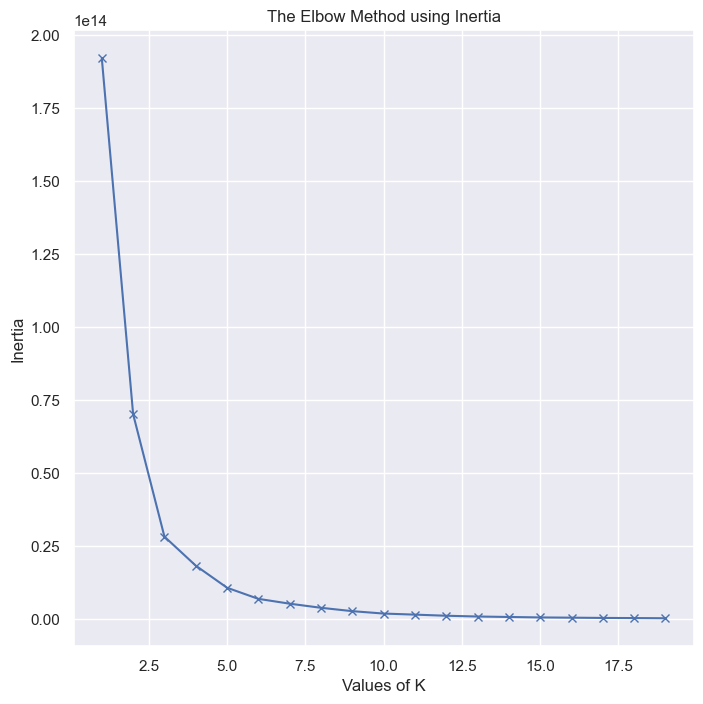

In [86]:

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
#Elbow point using inertia is approximately at 5 - 6.75

C:\Users\Arielle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


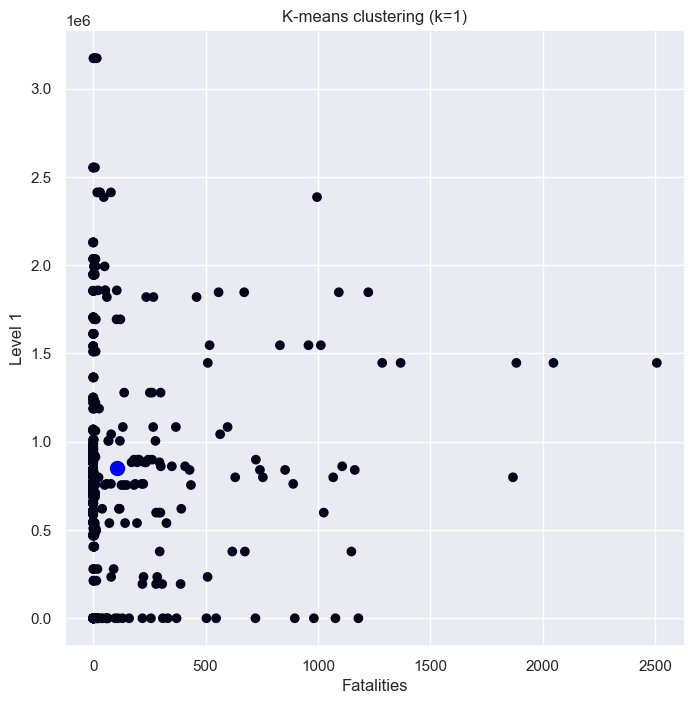

C:\Users\Arielle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


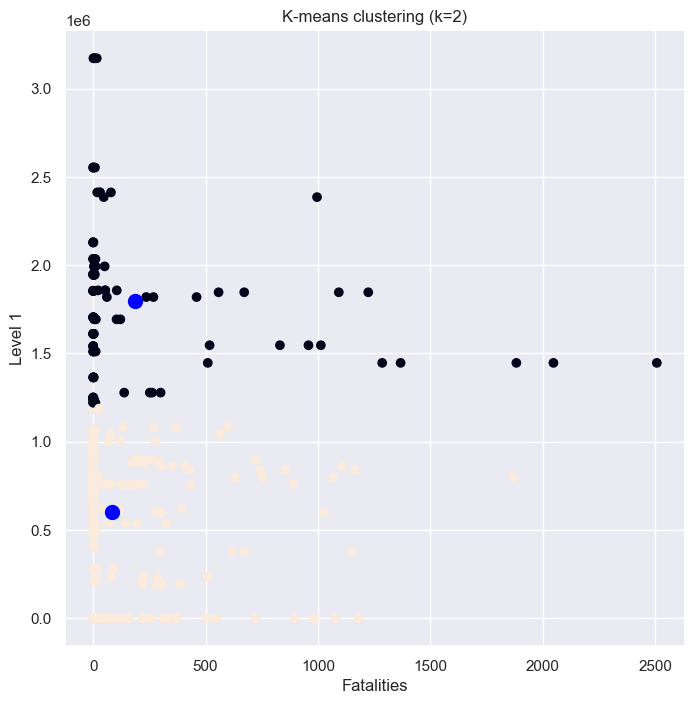

C:\Users\Arielle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


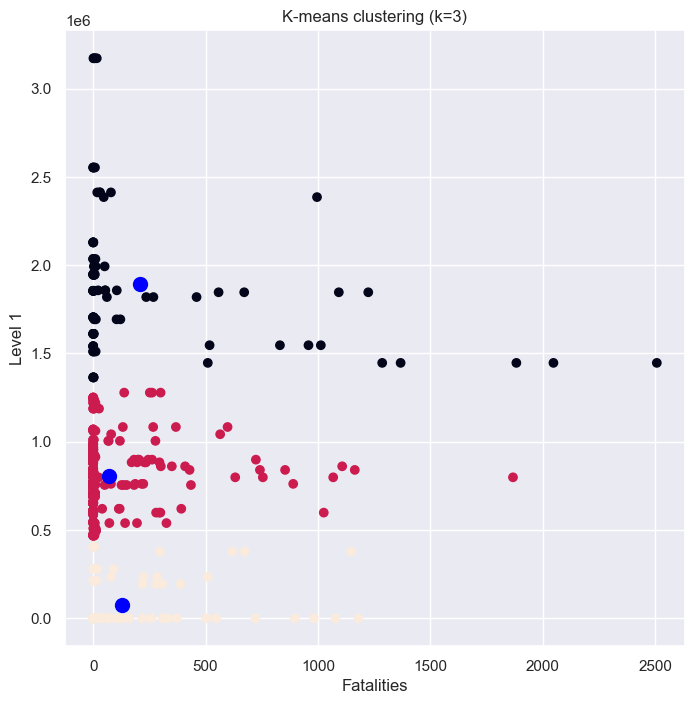

C:\Users\Arielle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


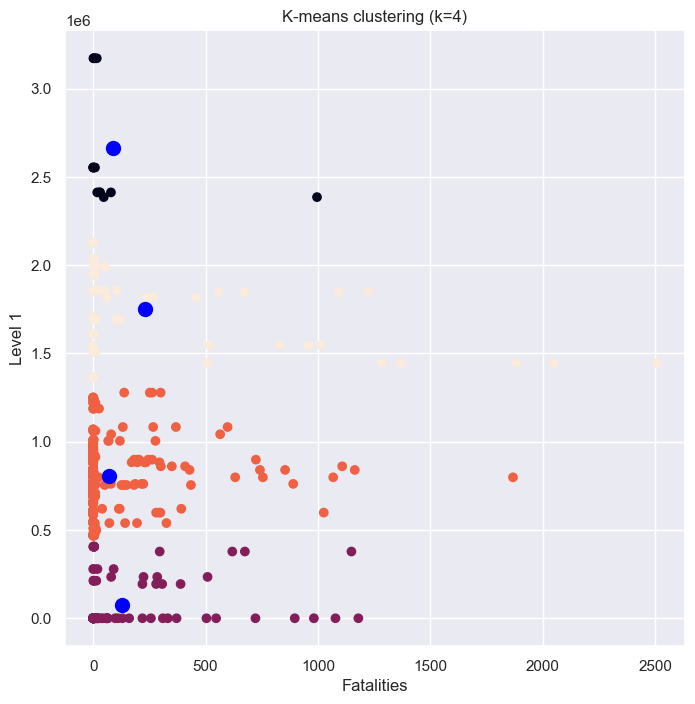

C:\Users\Arielle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


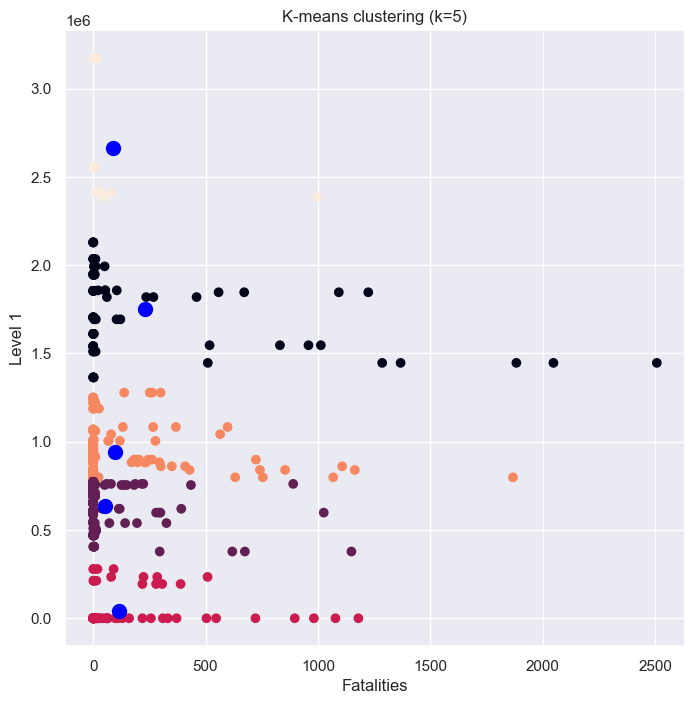

C:\Users\Arielle\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


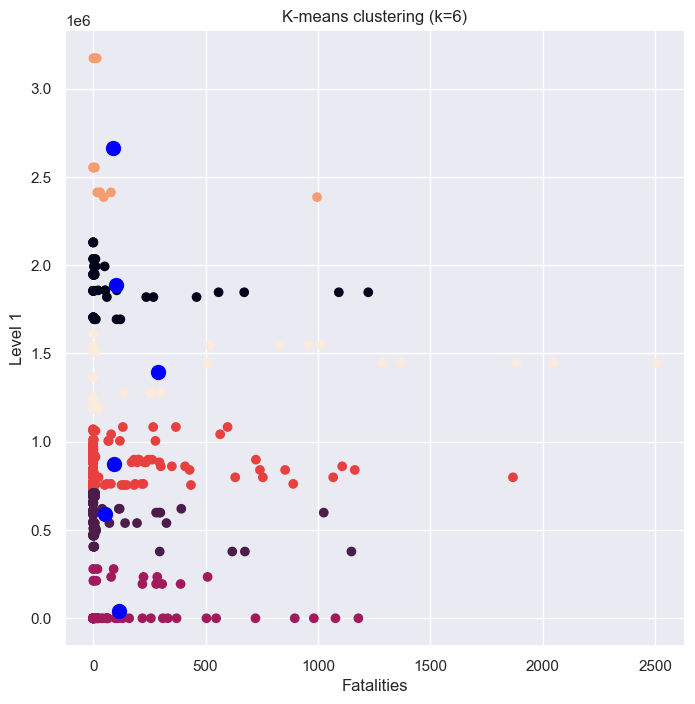

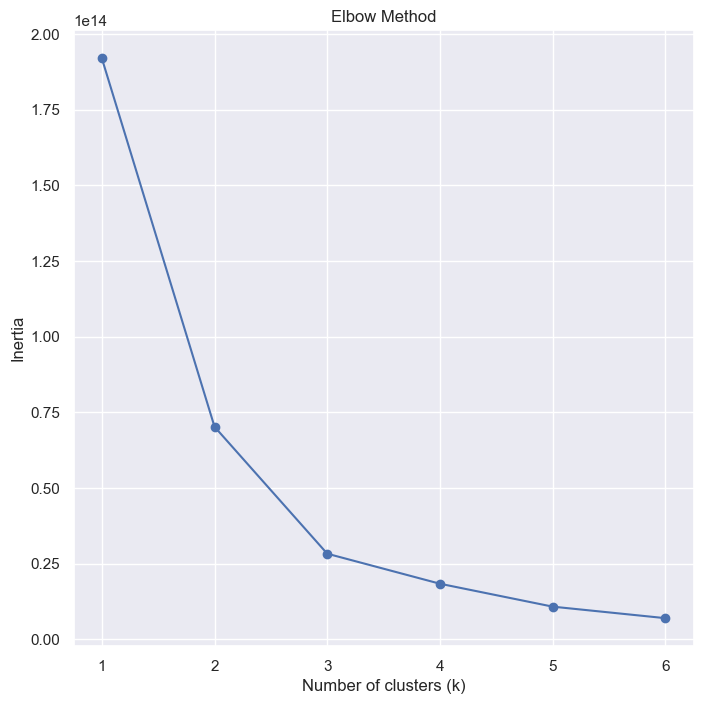

In [94]:
 
# Create a range of values for k
k_range = range(1, 7)
 
# Initialize an empty list to 
# store the inertia values for each k
inertia_values = []
 
# Fit and plot the data for each k value
for k in k_range:
    kmeans = KMeans(n_clusters=k, \
                    init='k-means++', random_state=30)
    y_kmeans = kmeans.fit_predict(X)
    inertia_values.append(kmeans.inertia_)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)
    plt.scatter(kmeans.cluster_centers_[:, 0],\
                kmeans.cluster_centers_[:, 1], \
                s=100, c='blue')
    plt.title('K-means clustering (k={})'.format(k))
    plt.xlabel('Fatalities')
    plt.ylabel('Level 1')
    plt.show()
 
# Plot the inertia values for each k
plt.plot(k_range, inertia_values, 'bo-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()